# Import dependencies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Create some random-ish scatter data

In [2]:
x = np.random.normal(scale=1.5, size=[20])
b = np.random.normal(scale=2, size=[20])
y = (3 * x) + (2 * b)

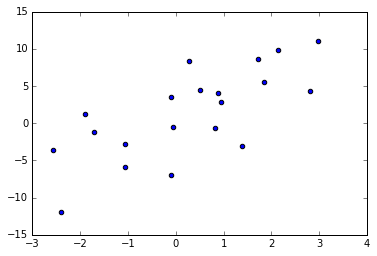

In [3]:
plt.scatter(x, y)
plt.show()

# Create our linear model graph

* `x_placeholder` and `y_placeholder` are our placeholder operations, which hold the input and correct output, respectively
* Our `m` and `b` units are `tf.Variable` nodes. These are what will be trained by our optimizer object. We instantiate `m` to have a normal distribution (with values +/- 2 standard deviations resampled), while `b` starts off as a vector of zeros
* We get our estimated value, `y_hat` by multiplying `m` and `x`, then adding b.
* We're using mean squared error as our target function
* `GradientDescentOptimizer` is one of several `tf.Optimizer` classes, this one performs standard gradient descent. We set our learning rate to 0.05, and our goal is to minimize `error`

In [4]:
x_placeholder = tf.placeholder(tf.float32, [None], name='x')
y_placeholder = tf.placeholder(tf.float32, [None], name='y')
m = tf.Variable(tf.truncated_normal([]), name='m')
b = tf.Variable(tf.constant(0, dtype=tf.float32), name='b')
y_hat = tf.mul(m, x_placeholder) + b

error = tf.reduce_mean(tf.square(y_hat - y_placeholder), name='MSE')

train = tf.train.GradientDescentOptimizer(0.05).minimize(error)

init = tf.initialize_all_variables()

# Now run the graph

In [5]:
sess = tf.Session()
sess.run(init)

x_test = np.array([-5.0, 0.0, 5.0])
test_dict = {x_placeholder: x_test}
snapshots = []

for i in range(50):
    feed_dict = {
        x_placeholder: x,
        y_placeholder: y
    }
    err, _ = sess.run([error, train], feed_dict=feed_dict)
    print(str(i) + ":\tMSE: %.3f" % err)
    
    if i in [0, 1, 4, 10, 49]:
        y_test = sess.run(y_hat, feed_dict=test_dict)
        snapshots.append((i, y_test))
    

0:	MSE: 28.125
1:	MSE: 22.686
2:	MSE: 19.787
3:	MSE: 18.239
4:	MSE: 17.411
5:	MSE: 16.967
6:	MSE: 16.728
7:	MSE: 16.599
8:	MSE: 16.529
9:	MSE: 16.490
10:	MSE: 16.468
11:	MSE: 16.455
12:	MSE: 16.448
13:	MSE: 16.443
14:	MSE: 16.440
15:	MSE: 16.438
16:	MSE: 16.437
17:	MSE: 16.435
18:	MSE: 16.435
19:	MSE: 16.434
20:	MSE: 16.434
21:	MSE: 16.433
22:	MSE: 16.433
23:	MSE: 16.433
24:	MSE: 16.432
25:	MSE: 16.432
26:	MSE: 16.432
27:	MSE: 16.432
28:	MSE: 16.432
29:	MSE: 16.432
30:	MSE: 16.432
31:	MSE: 16.432
32:	MSE: 16.432
33:	MSE: 16.432
34:	MSE: 16.432
35:	MSE: 16.432
36:	MSE: 16.432
37:	MSE: 16.432
38:	MSE: 16.432
39:	MSE: 16.432
40:	MSE: 16.432
41:	MSE: 16.432
42:	MSE: 16.432
43:	MSE: 16.432
44:	MSE: 16.432
45:	MSE: 16.432
46:	MSE: 16.432
47:	MSE: 16.432
48:	MSE: 16.432
49:	MSE: 16.432


# Graph what the model looks like as it learns

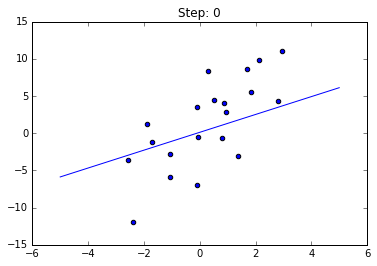

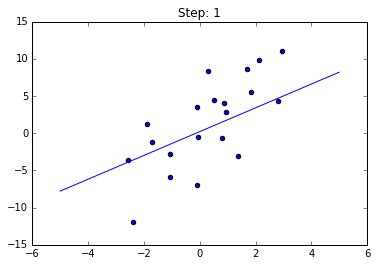

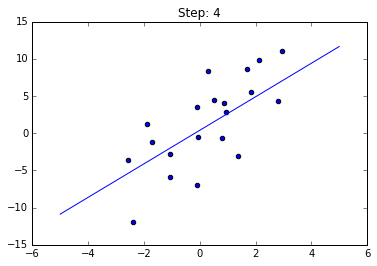

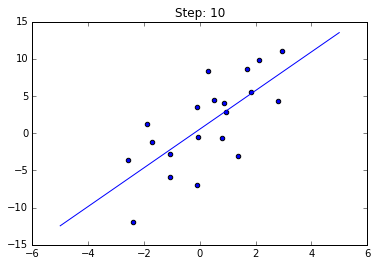

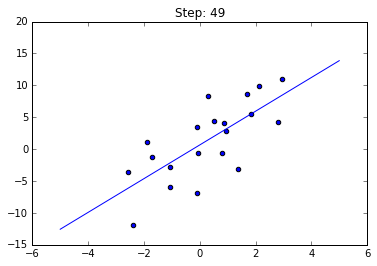

In [6]:
for i, pair in enumerate(snapshots):
    step, y_test = pair
    plt.figure(i)
    plt.title('Step: ' + str(step))
    plt.scatter(x, y)
    plt.plot(x_test, y_test)
plt.show()